<a href="https://colab.research.google.com/github/Pavithratrdev/Alphabet-Recognition/blob/main/catVSdog_Simple_CNN_using_TF_Data_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # system function
import cv2 # open cv
import numpy as np # numpy array
from zipfile import ZipFile # extract file
from tqdm import tqdm # progress bar

In [ ]:
!cp /content/drive/MyDrive/dataset/cats_and_dogs_filtered.zip /content

In [ ]:
root_path = '/content/cats_and_dogs_filtered.zip'  #change dir to your project folder

In [ ]:
# Uncompress the feature images and labels csv
def uncompress_features_labels(zip_file,folder_name):
    if(os.path.isdir(folder_name)):
        print('Data extracted')
    else:
        with ZipFile(zip_file) as zipf:
            zipf.extractall(folder_name)

In [ ]:
uncompress_features_labels(root_path,'catdog2')

Data extracted


In [ ]:
DATADIR = "data/data"
IMG_SIZE = 224

In [ ]:
import tensorflow as tf

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/catdog2/cats_and_dogs_filtered/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE))

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/catdog2/cats_and_dogs_filtered/train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE))

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


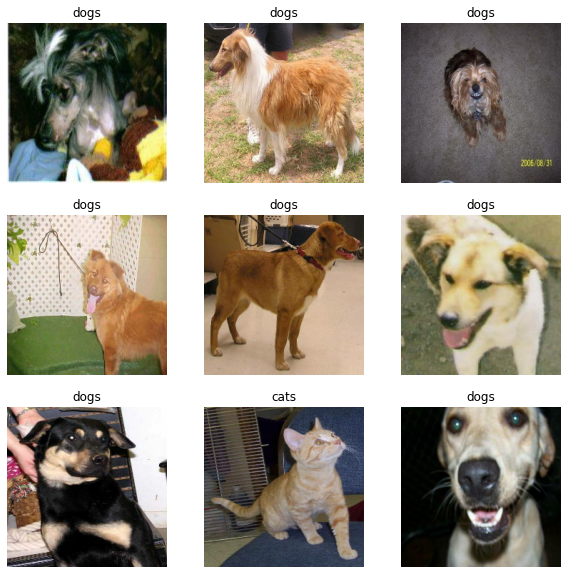

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## CNN Architectures

- LeNet
- AlexNet
- VGGNet
- Inception Net
- ResNet

![](https://miro.medium.com/max/1078/1*q1QRxnGxg8COheh8tWXAiw.png)

In [ ]:
import tensorflow.keras.layers as layers
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()

# 28 X 28 X 1

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3), data_format='channels_last'))
# 26 X 26 X 32
model.add(layers.MaxPooling2D((2,2)))
# 13 X 13 X 32
cl = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')
model.add(cl)
# 11 X 11 X 64
model.add(layers.MaxPooling2D((2,2)))
# 5 X 5 X 64

model.add(layers.Flatten())
# 1600

model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=len(class_names), activation = 'softmax'))

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=20, verbose=True, validation_data=val_ds)

Epoch 1/20
50/50 [==============================] - 12s 63ms/step - loss: 279.1620 - accuracy: 0.5231 - val_loss: 0.7315 - val_accuracy: 0.5150
Epoch 2/20
50/50 [==============================] - 3s 59ms/step - loss: 0.5186 - accuracy: 0.7406 - val_loss: 0.8550 - val_accuracy: 0.5350
Epoch 3/20
50/50 [==============================] - 3s 58ms/step - loss: 0.2787 - accuracy: 0.8819 - val_loss: 0.9889 - val_accuracy: 0.5375
Epoch 4/20
50/50 [==============================] - 3s 57ms/step - loss: 0.1386 - accuracy: 0.9556 - val_loss: 1.4564 - val_accuracy: 0.5525
Epoch 5/20
50/50 [==============================] - 3s 58ms/step - loss: 0.0660 - accuracy: 0.9825 - val_loss: 2.3190 - val_accuracy: 0.5400
Epoch 6/20
50/50 [==============================] - 3s 58ms/step - loss: 0.0333 - accuracy: 0.9906 - val_loss: 3.2318 - val_accuracy: 0.5450
Epoch 7/20
50/50 [==============================] - 3s 58ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 3.1005 - val_accuracy: 0.5400
Epoch 8/20

## Improve Accuracy

- Avoid overfitting (Model level changes)
  - Regularisation
  - Dropouts
- Get More features (Data level changes)
  - Collect more images
  - Data Augmentation
- Use Complex architectures
  - Build from scratch
  - Transfer learning

## Dropouts

In [ ]:
model = tf.keras.Sequential()

# 28 X 28 X 1

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3), data_format='channels_last'))
# 26 X 26 X 32
model.add(layers.MaxPooling2D((2,2)))
# 13 X 13 X 32
cl = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')
model.add(cl)
# 11 X 11 X 64
model.add(layers.MaxPooling2D((2,2)))
# 5 X 5 X 64

model.add(layers.Flatten())
# 1600

model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=len(class_names), activation = 'softmax'))

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=30, verbose=True, validation_data=val_ds)

Epoch 1/30
50/50 [==============================] - 4s 77ms/step - loss: 150.6340 - accuracy: 0.5387 - val_loss: 0.7020 - val_accuracy: 0.5275
Epoch 2/30
50/50 [==============================] - 4s 68ms/step - loss: 0.6175 - accuracy: 0.6575 - val_loss: 0.7567 - val_accuracy: 0.5725
Epoch 3/30
50/50 [==============================] - 3s 59ms/step - loss: 0.5168 - accuracy: 0.7681 - val_loss: 0.7868 - val_accuracy: 0.5900
Epoch 4/30
50/50 [==============================] - 3s 59ms/step - loss: 0.3599 - accuracy: 0.8331 - val_loss: 0.9939 - val_accuracy: 0.6025
Epoch 5/30
50/50 [==============================] - 3s 59ms/step - loss: 0.2816 - accuracy: 0.8863 - val_loss: 1.0109 - val_accuracy: 0.5650
Epoch 6/30
50/50 [==============================] - 3s 59ms/step - loss: 0.1905 - accuracy: 0.9256 - val_loss: 1.1561 - val_accuracy: 0.6025
Epoch 7/30
50/50 [==============================] - 3s 59ms/step - loss: 0.1465 - accuracy: 0.9444 - val_loss: 1.1838 - val_accuracy: 0.5925
Epoch 8/30


## Data Augmentation (Data Level Changes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


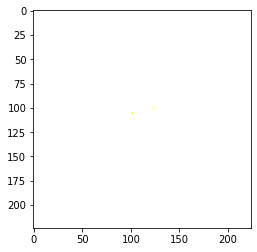

In [ ]:
for images, label in train_ds.take(1):
  _ = plt.imshow(images[2])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

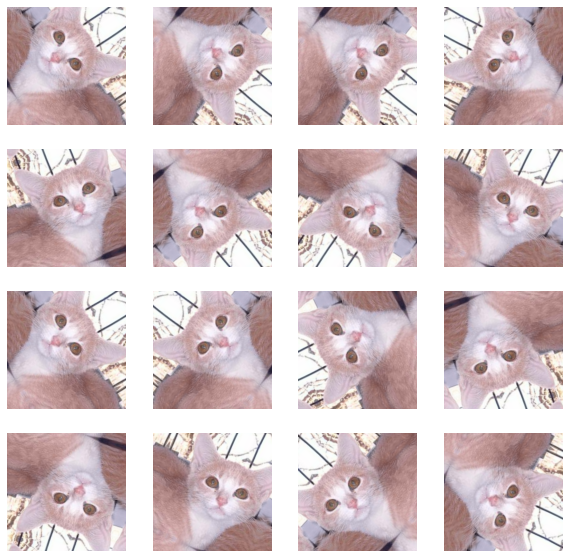

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential()

model.add(layers.RandomFlip("horizontal_and_vertical"))
model.add(layers.RandomRotation(0.2))

# 28 X 28 X 1
model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# 26 X 26 X 32
model.add(layers.MaxPooling2D((2,2)))
# 13 X 13 X 32
cl = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')
model.add(cl)
# 11 X 11 X 64
model.add(layers.MaxPooling2D((2,2)))
# 5 X 5 X 64
cl = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu')

model.add(layers.Flatten())
# 1600

model.add(layers.Dropout(0.25))

model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(units=len(class_names), activation = 'softmax'))

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, verbose=True, validation_data=val_ds)

Epoch 1/10
50/50 [==============================] - 4s 74ms/step - loss: 0.4710 - accuracy: 0.7856 - val_loss: 0.6599 - val_accuracy: 0.7100
Epoch 2/10
50/50 [==============================] - 4s 72ms/step - loss: 0.4604 - accuracy: 0.7806 - val_loss: 0.6350 - val_accuracy: 0.7125
Epoch 3/10
50/50 [==============================] - 4s 66ms/step - loss: 0.4617 - accuracy: 0.7837 - val_loss: 0.6605 - val_accuracy: 0.7250
Epoch 4/10
50/50 [==============================] - 4s 67ms/step - loss: 0.4637 - accuracy: 0.7738 - val_loss: 0.6482 - val_accuracy: 0.7200
Epoch 5/10
50/50 [==============================] - 4s 67ms/step - loss: 0.4694 - accuracy: 0.7862 - val_loss: 0.6104 - val_accuracy: 0.7200
Epoch 6/10
50/50 [==============================] - 4s 67ms/step - loss: 0.4649 - accuracy: 0.7837 - val_loss: 0.6085 - val_accuracy: 0.7100
Epoch 7/10
50/50 [==============================] - 4s 67ms/step - loss: 0.4327 - accuracy: 0.7975 - val_loss: 0.6283 - val_accuracy: 0.7125
Epoch 8/10
50

## Transfer Leraning

In [ ]:
import tensorflow_hub as hub


In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/classification/1")
])
m.build([None, IMG_SIZE, IMG_SIZE, 3])  # Batch input shape.

In [ ]:
m.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              5330564   
                                                                 
Total params: 5,330,564
Trainable params: 0
Non-trainable params: 5,330,564
_________________________________________________________________


In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

--2022-02-15 14:27:25--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0.001s  

2022-02-15 14:27:26 (9.46 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 0us/step


In [ ]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [ ]:
for images, labels in train_ds.take(1):
  print(labels)
  for pred in m.predict(images):
    print(imagenet_labels[np.argmax(pred)])

tf.Tensor([0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0], shape=(32,), dtype=int32)
barometer
rocking chair
Loafer
puck
espresso maker
crayfish
sunglasses
espresso maker
Loafer
paper towel
yellow lady's slipper
hammer
ballpoint
photocopier
French horn
shower curtain
Polaroid camera
doormat
Dutch oven
slide rule
space bar
mousetrap
rock crab
ballpoint
barrel
printer
oboe
shoe shop
bicycle-built-for-two
photocopier
wing
frilled lizard


## using pretrained layer and finetuning

In [ ]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Dense(2, activation='softmax')
])

In [ ]:
classifier.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_10 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
classifier.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(train_ds, epochs=20, verbose=True, validation_data=val_ds)

Epoch 1/20
50/50 [==============================] - 6s 72ms/step - loss: 0.6698 - accuracy: 0.6131 - val_loss: 0.6488 - val_accuracy: 0.5925
Epoch 2/20
50/50 [==============================] - 3s 62ms/step - loss: 0.6040 - accuracy: 0.6775 - val_loss: 0.6007 - val_accuracy: 0.6625
Epoch 3/20
50/50 [==============================] - 3s 62ms/step - loss: 0.5782 - accuracy: 0.7125 - val_loss: 0.5971 - val_accuracy: 0.6800
Epoch 4/20
50/50 [==============================] - 3s 63ms/step - loss: 0.5576 - accuracy: 0.7181 - val_loss: 0.5750 - val_accuracy: 0.7000
Epoch 5/20
50/50 [==============================] - 3s 62ms/step - loss: 0.5455 - accuracy: 0.7256 - val_loss: 0.5732 - val_accuracy: 0.6975
Epoch 6/20
50/50 [==============================] - 3s 61ms/step - loss: 0.5267 - accuracy: 0.7375 - val_loss: 0.5644 - val_accuracy: 0.7075
Epoch 7/20
50/50 [==============================] - 3s 62ms/step - loss: 0.5188 - accuracy: 0.7475 - val_loss: 0.5638 - val_accuracy: 0.7025
Epoch 8/20
50